## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [4]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [26]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [24]:
learning_rate = 1e-3
epochs = 50
batch_size = [64, 128, 256]
momentum = 0.95

In [27]:
results = {}

for bn in batch_size:
    model=build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = learning_rate, nesterov=True,
                                    momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=epochs,
             batch_size=bn,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    train_loss=model.history.history['loss']
    valid_loss=model.history.history['val_loss']
    train_acc=model.history.history['accuracy']
    valid_acc=model.history.history['val_accuracy']
    
    exp_batchsize_tag = 'exp-bn-{}'.format(bn)
    results[exp_batchsize_tag]={'train_loss': train_loss,
                                'valid_loss': valid_loss,
                                'train_acc': train_acc,
                                'valid_acc': valid_acc}

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

Epoch 48/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1334 - accuracy: 0.9542 - val_loss: 2.5034 - val_accuracy: 0.5300
Epoch 49/50
782/782 [==============================] - 16s 20ms/step - loss: 0.1388 - accuracy: 0.9515 - val_loss: 2.5116 - val_accuracy: 0.5385
Epoch 50/50
782/782 [==============================] - 12s 16ms/step - loss: 0.1247 - accuracy: 0.9571 - val_loss: 2.4692 - val_accuracy: 0.5354
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_

Epoch 45/50
391/391 [==============================] - 11s 27ms/step - loss: 0.0745 - accuracy: 0.9776 - val_loss: 2.5618 - val_accuracy: 0.5223
Epoch 46/50
391/391 [==============================] - 12s 32ms/step - loss: 0.0642 - accuracy: 0.9822 - val_loss: 2.6088 - val_accuracy: 0.5207
Epoch 47/50
391/391 [==============================] - 13s 34ms/step - loss: 0.0714 - accuracy: 0.9786 - val_loss: 2.6137 - val_accuracy: 0.5145
Epoch 48/50
391/391 [==============================] - 12s 31ms/step - loss: 0.0641 - accuracy: 0.9816 - val_loss: 2.6162 - val_accuracy: 0.5161
Epoch 49/50
391/391 [==============================] - 14s 35ms/step - loss: 0.0630 - accuracy: 0.9818 - val_loss: 2.6424 - val_accuracy: 0.5217
Epoch 50/50
391/391 [==============================] - 12s 31ms/step - loss: 0.0622 - accuracy: 0.9818 - val_loss: 2.6746 - val_accuracy: 0.5154
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape      

196/196 [==============================] - 8s 42ms/step - loss: 0.0582 - accuracy: 0.9914 - val_loss: 2.4100 - val_accuracy: 0.5129
Epoch 43/50
196/196 [==============================] - 9s 47ms/step - loss: 0.0598 - accuracy: 0.9901 - val_loss: 2.4179 - val_accuracy: 0.5109
Epoch 44/50
196/196 [==============================] - 9s 44ms/step - loss: 0.0505 - accuracy: 0.9933 - val_loss: 2.4652 - val_accuracy: 0.5051
Epoch 45/50
196/196 [==============================] - 13s 64ms/step - loss: 0.0477 - accuracy: 0.9928 - val_loss: 2.4902 - val_accuracy: 0.5061
Epoch 46/50
196/196 [==============================] - 10s 50ms/step - loss: 0.0440 - accuracy: 0.9938 - val_loss: 2.4959 - val_accuracy: 0.5109
Epoch 47/50
196/196 [==============================] - 9s 48ms/step - loss: 0.0388 - accuracy: 0.9954 - val_loss: 2.5250 - val_accuracy: 0.5050
Epoch 48/50
196/196 [==============================] - 8s 42ms/step - loss: 0.0368 - accuracy: 0.9950 - val_loss: 2.5687 - val_accuracy: 0.5113
Ep

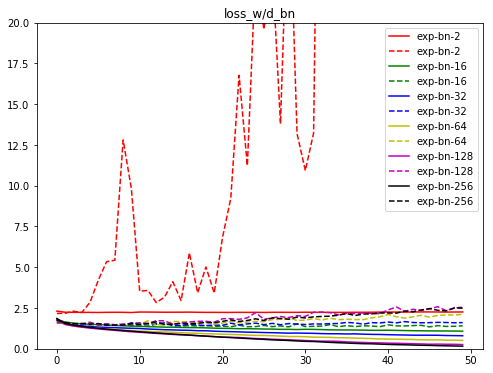

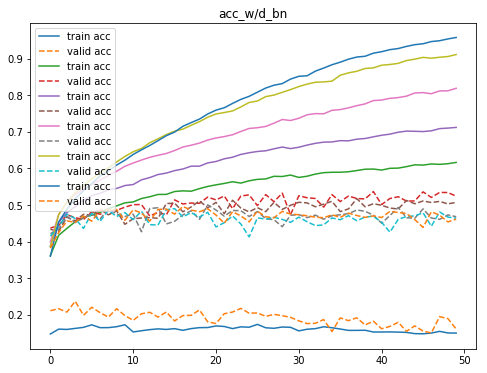

'Code Here\n將結果繪出\n'

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.ylim([0,20])
plt.title('loss_w/d_bn')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'],'-', label='train acc')
    plt.plot(range(len(results[cond]['valid_acc'])), results[cond]['valid_acc'], '--',label='valid acc')
plt.legend()
plt.title('acc_w/d_bn')
plt.show()

"""Code Here
將結果繪出
"""

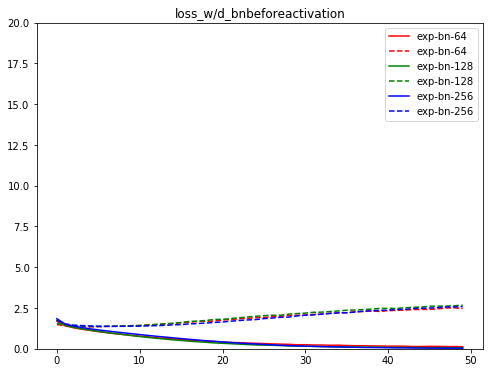

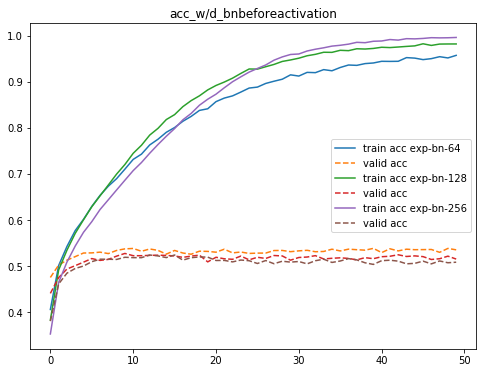

In [29]:
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.ylim([0,20])
plt.title('loss_w/d_bnbeforeactivation')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'],'-', label='train acc {}'.format(cond))
    plt.plot(range(len(results[cond]['valid_acc'])), results[cond]['valid_acc'], '--',label='valid acc')
plt.legend()
plt.title('acc_w/d_bnbeforeactivation')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()